In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [3]:
df = pd.read_csv('/content/reviews.csv')

In [4]:
print(df.columns)

Index(['reviews', 'label'], dtype='object')


In [5]:
df.columns = ['review', 'label']

In [6]:
print(df.isnull().sum())

review    0
label     0
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
df.to_csv('/content/reviews_clean.csv', index=False)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [10]:
df = pd.read_csv('/content/reviews_clean.csv')
df.columns = ['review', 'label']

In [11]:
print(df.head())
print(df['label'].value_counts())

                                              review  label
0  kemeja nya bagusss bgtttt😍😍😍aaaa mauuu nngisss...    1.0
1  Jahitannya sih rapi,cuman ada benang yang ikut...    0.0
2  Sesuai harga. Agak tipis tapi masih oke kok. W...    0.0
3  Wah gila sihhh sebagus itu, se worth it, se  l...    1.0
4  Kain nya bagus halus  \nTapi kok di bukak koto...    0.0
label
0.0    446
1.0    385
Name: count, dtype: int64


In [12]:
X = df['review']
y = df['label']

In [13]:
vectorizer = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

In [16]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy: 0.9221556886227545
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        84
         1.0       1.00      0.84      0.92        83

    accuracy                           0.92       167
   macro avg       0.93      0.92      0.92       167
weighted avg       0.93      0.92      0.92       167



In [19]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


=== Support Vector Machine ===
Accuracy: 0.9401197604790419
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        84
         1.0       1.00      0.88      0.94        83

    accuracy                           0.94       167
   macro avg       0.95      0.94      0.94       167
weighted avg       0.95      0.94      0.94       167



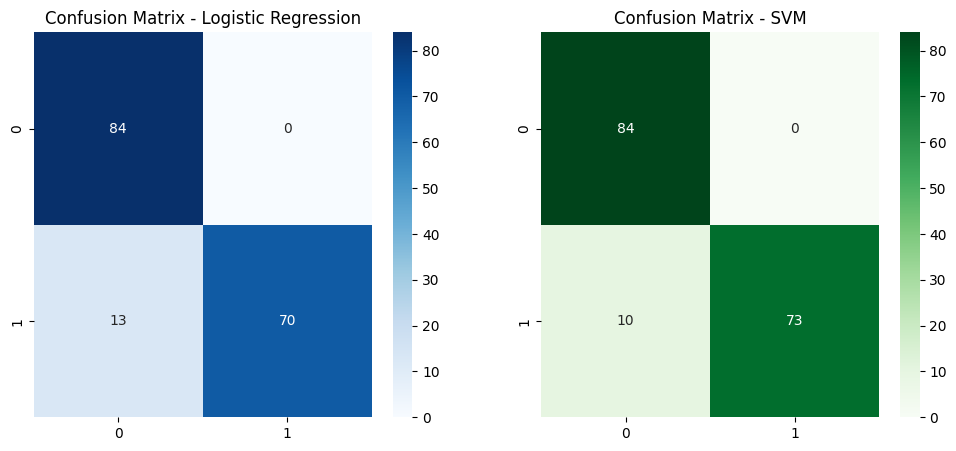

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.show()

In [22]:
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        84
         1.0       1.00      0.88      0.94        83

    accuracy                           0.94       167
   macro avg       0.95      0.94      0.94       167
weighted avg       0.95      0.94      0.94       167

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        84
         1.0       1.00      0.84      0.92        83

    accuracy                           0.92       167
   macro avg       0.93      0.92      0.92       167
weighted avg       0.93      0.92      0.92       167



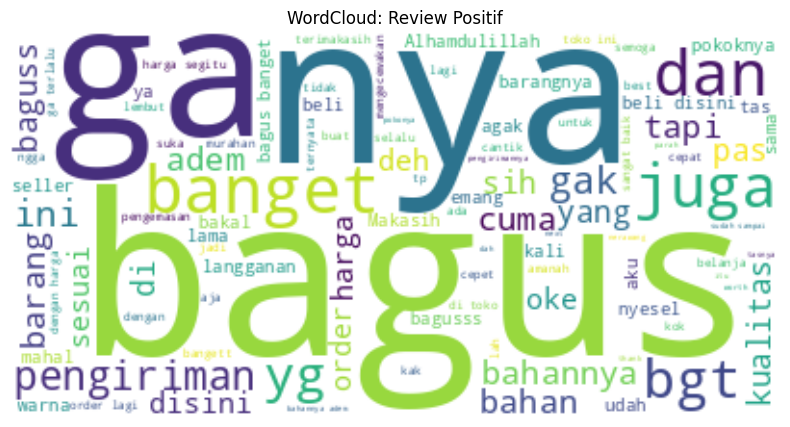

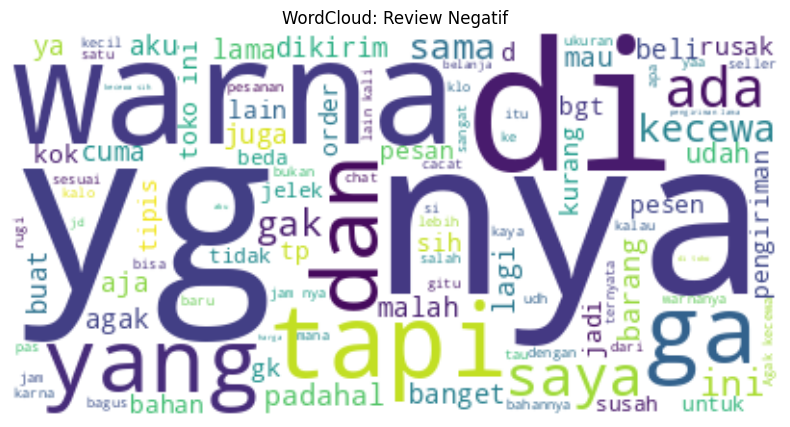

In [21]:
df['label'] = df['label'].astype(int)

positive_reviews = df[df['label'] == 1]['review']
negative_reviews = df[df['label'] == 0]['review']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

if positive_text.strip():
    wordcloud_pos = WordCloud(background_color='white', max_words=100).generate(positive_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud: Review Positif")
    plt.show()
else:
    print("Tidak ada review positif yang tersedia untuk WordCloud.")

if negative_text.strip():
    wordcloud_neg = WordCloud(background_color='white', max_words=100).generate(negative_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud: Review Negatif")
    plt.show()
else:
    print("Tidak ada review negatif yang tersedia untuk WordCloud.")